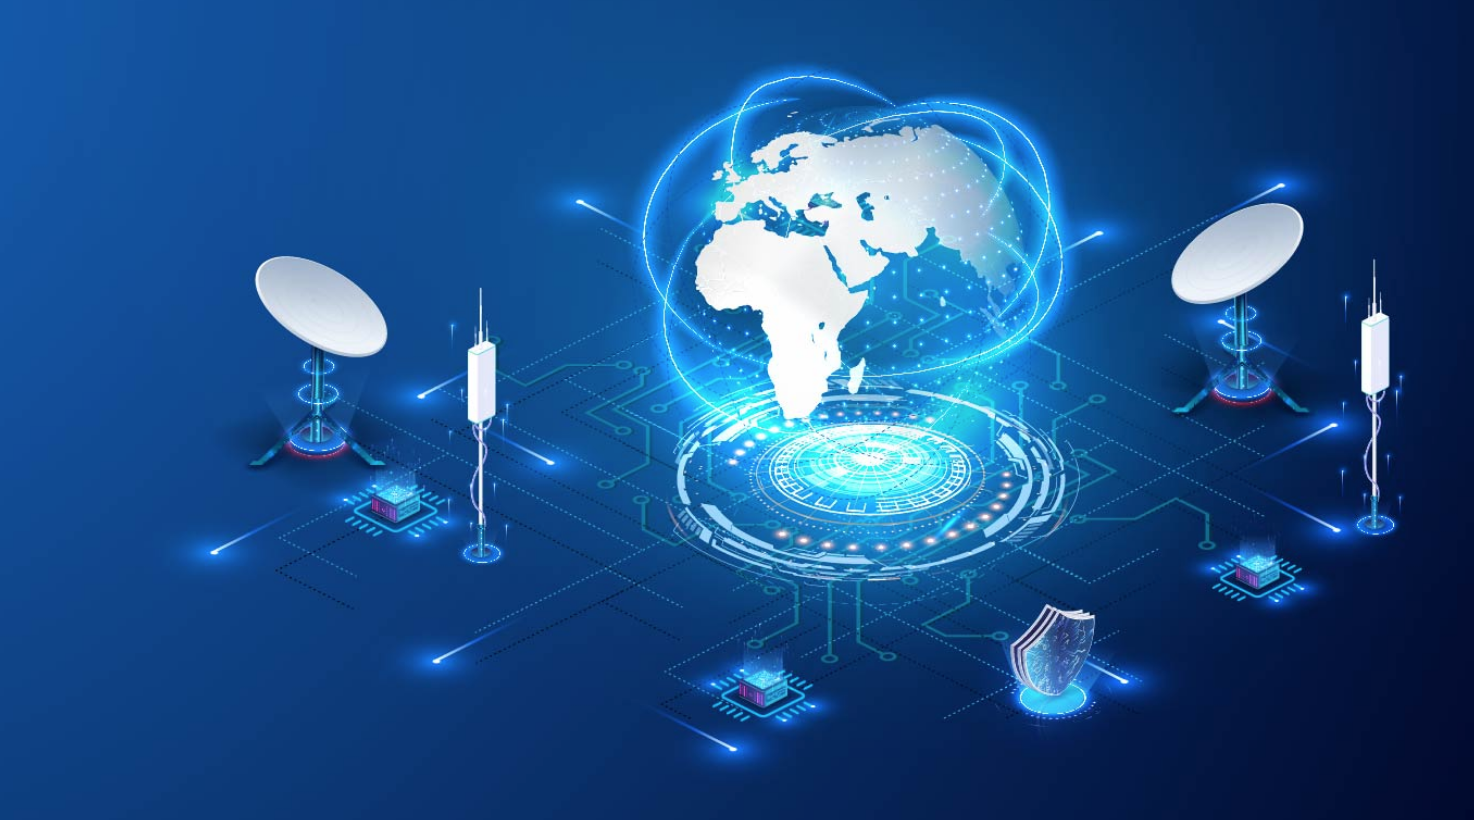


#Problem Statement:
The telecommunications company aims to understand customer behavior and reduce churn—the rate at which customers leave the service. The dataset contains demographic, service usage, and account-related information for each customer, such as gender, tenure, service subscriptions, and payment methods.

The goal is to develop a predictive model that accurately identifies customers who are likely to churn (leave the service) based on these features. By understanding which factors contribute most to churn, the company can take targeted actions to retain valuable customers and improve overall satisfaction.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN

In [5]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.shape

(7043, 21)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


# 🔑 Key Summary Insights:
##🧓 SeniorCitizen (0 = No, 1 = Yes)
Only 16% of the customers are senior citizens (mean = 0.162).

Most values are 0 (non-senior), as shown by 25%, 50%, and 75% all being 0.

Binary variable (values range from 0 to 1).

##📆 Tenure (Number of months with the company)
Tenure ranges from 0 to 72 months.

Median customer stays for 29 months.

25% of customers stay less than 9 months → possible churn risk group.

75% stay up to 55 months, showing many long-term customers.

##💵 MonthlyCharges
Charges range from $18.25 to $118.75.

Median charge is $70.35, which means most customers pay moderate to high rates.

25% of customers are paying less than $35.50, likely using minimal services.

There’s a wide spread in monthly charges (std ≈ $30), indicating a diverse set of service plans.

In [11]:
df.describe(include='object')

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,3186-AJIEK,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In [12]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')


In [13]:
df['TotalCharges'].describe()


,TotalCharges
count,7032.000000
mean,2283.300441
std,2266.771362
min,18.800000
25%,401.450000
50%,1397.475000
75%,3794.737500
max,8684.800000


#🔑 Categorical Data Summary

##🚻 gender
2 categories: Male, Female

Most common: Male (3555 customers)

##❤️ Partner & 👶 Dependents
Both are Yes/No variables

Majority do not have a partner (3641) or dependents (4933)

##☎️ PhoneService
2 categories: Yes/No

Most have phone service (6361 customers)

##📞 MultipleLines
3 categories: Yes, No, No phone service

Common value: No (3390 customers)

##🌐 InternetService
3 types: DSL, Fiber optic, No

Most common: Fiber optic (3096 customers)

##🔐 Internet-Related Services
Includes:

OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies

All have 3 categories: Yes, No, No internet service

Most customers do not use these services

##📄 Contract
3 types: Month-to-month, One year, Two year

Most common: Month-to-month (3875 customers) → often associated with higher churn risk

##📧 PaperlessBilling
2 options: Yes, No

Most common: Yes (4171 customers)

##💳 PaymentMethod
4 categories

Most common: Electronic check (2365 customers)

##📺 StreamingTV
3 categories

Most do not use streaming TV (2810 customers)

##🎬 StreamingMovies
3 categories

Most do not use streaming movies (2785 customers)

##☁️ OnlineBackup
3 categories

Most customers do not have online backup (3088)

##💻 DeviceProtection
3 categories

Most common: No (3095 customers)

##👨‍💻 TechSupport
3 categories

Majority: No tech support (3473 customers)

##🚪 Churn
2 categories: Yes/No

Most customers did not churn (5174 = ~73.5%)

##💰 TotalCharges
Numeric column representing total amount paid by a customer

Mean: $2283.30, ranges from $18.80 to $8684.80



In [14]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [15]:
# drop
df.dropna(inplace=True)

# 🔹 Univariate Analysis

<Axes: xlabel='Churn'>

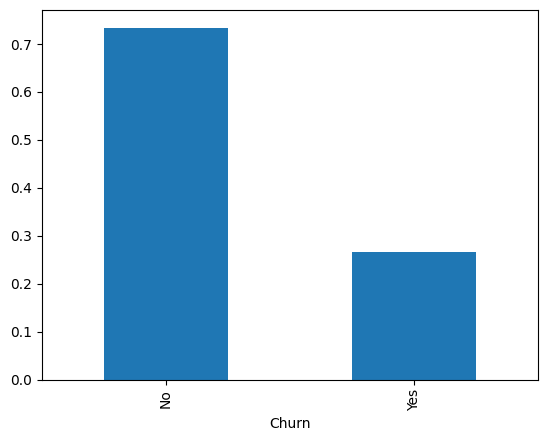

In [16]:
df['Churn'].value_counts(normalize=True).plot(kind='bar')

<Axes: xlabel='Contract'>

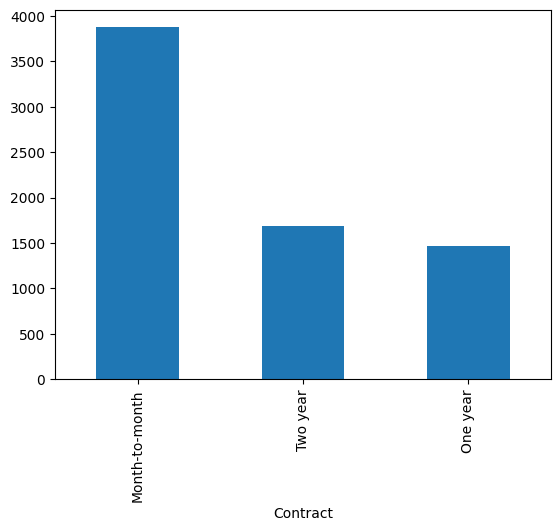

In [17]:
df['Contract'].value_counts().plot(kind='bar')


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

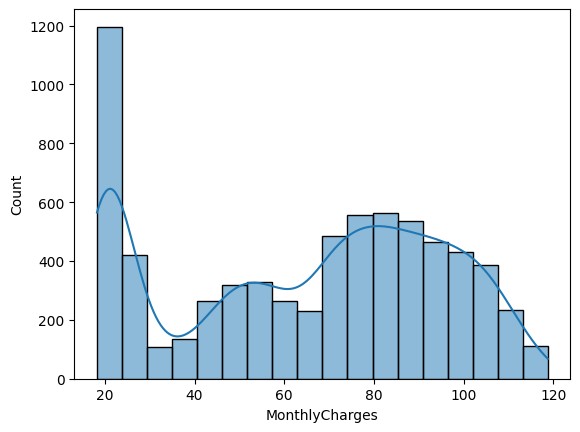

In [18]:
sns.histplot(df['MonthlyCharges'], kde=True)

<Axes: xlabel='tenure'>

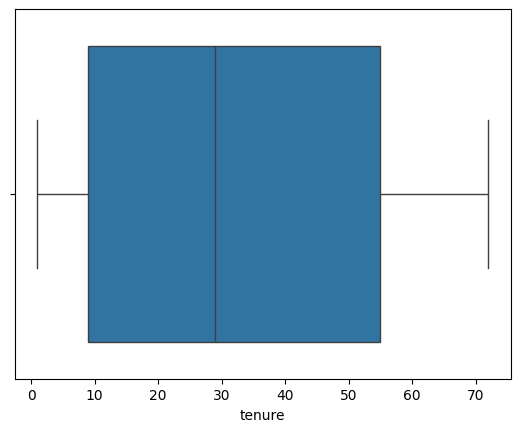

In [19]:
sns.boxplot(x=df['tenure'])

#🔹 Bivariate Analysis

<Axes: xlabel='Contract'>

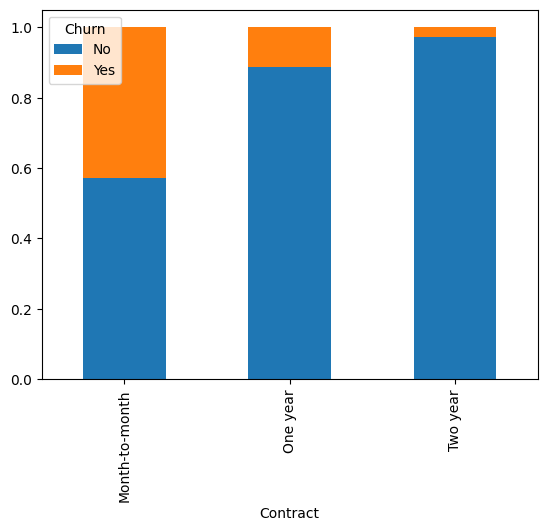

In [20]:
pd.crosstab(df['Contract'], df['Churn'], normalize='index').plot(kind='bar', stacked=True)


<Axes: xlabel='PaymentMethod'>

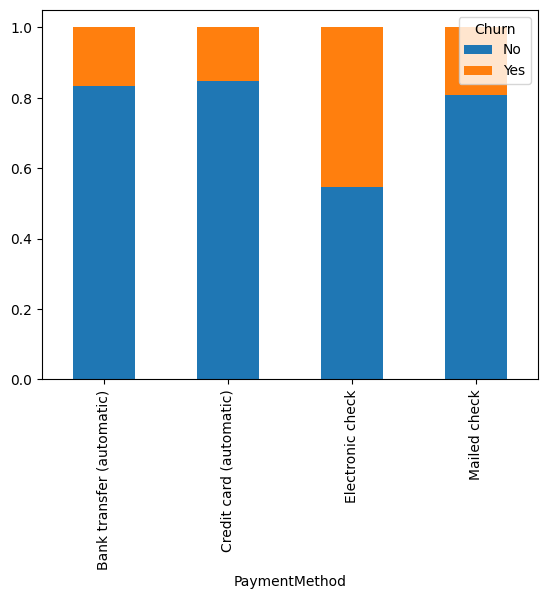

In [21]:
pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index').plot(kind='bar', stacked=True)


<Axes: xlabel='InternetService'>

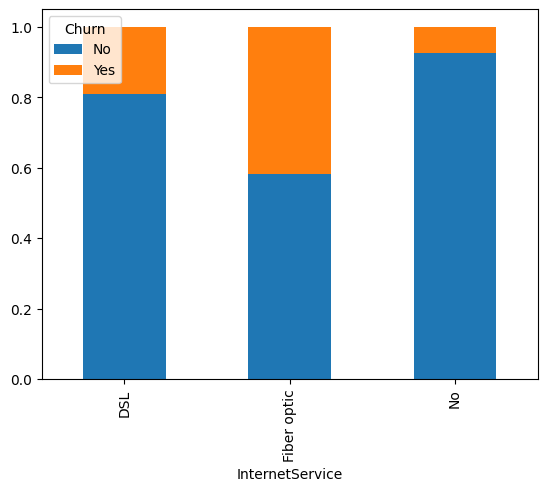

In [22]:
pd.crosstab(df['InternetService'], df['Churn'], normalize='index').plot(kind='bar', stacked=True)


<Axes: xlabel='TechSupport'>

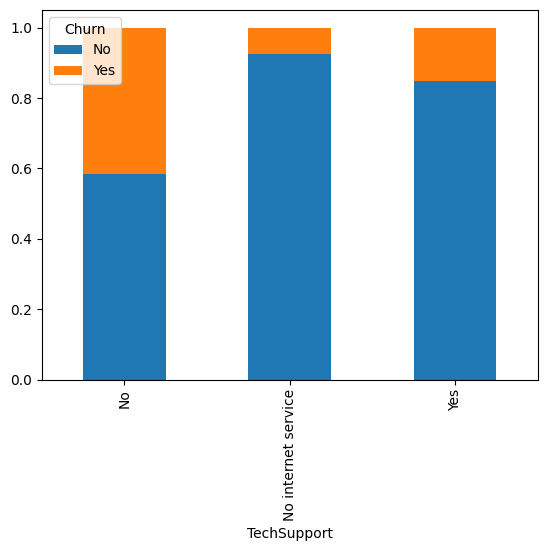

In [23]:
pd.crosstab(df['TechSupport'], df['Churn'], normalize='index').plot(kind='bar', stacked=True)


<Axes: xlabel='Churn', ylabel='MonthlyCharges'>

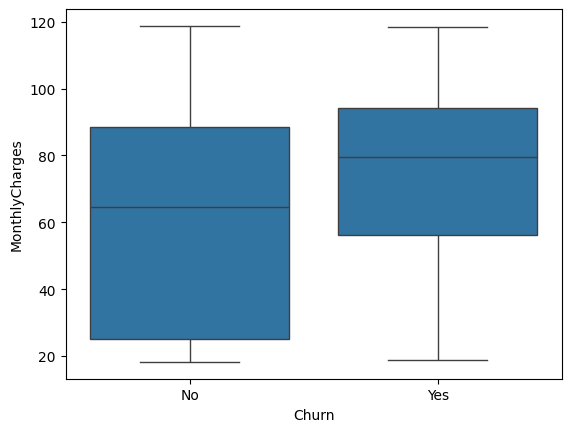

In [24]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df)

<Axes: xlabel='Churn', ylabel='TotalCharges'>

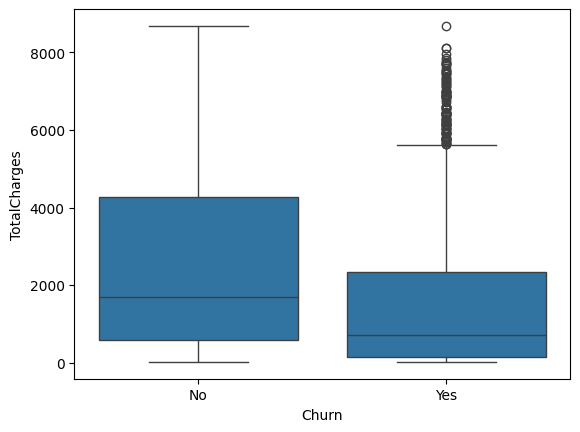

In [25]:
sns.boxplot(x='Churn', y='TotalCharges', data=df)

In [26]:
df.groupby('Churn')[['MonthlyCharges', 'TotalCharges', 'tenure']].mean()


,MonthlyCharges,TotalCharges,tenure
Churn,,,
No,61.307408,2555.344141,37.650010
Yes,74.441332,1531.796094,17.979133


Customers who did not churn paid lower monthly charges ($61.27),  but accumulated                            

higher total charges ($2555.34) and stayed longer (avg. 38 months).

Customers who churned had higher monthly charges ($74.44),

but much lower total charges ($1531.80) and left earlier (avg. 18 months).

<Axes: xlabel='InternetService'>

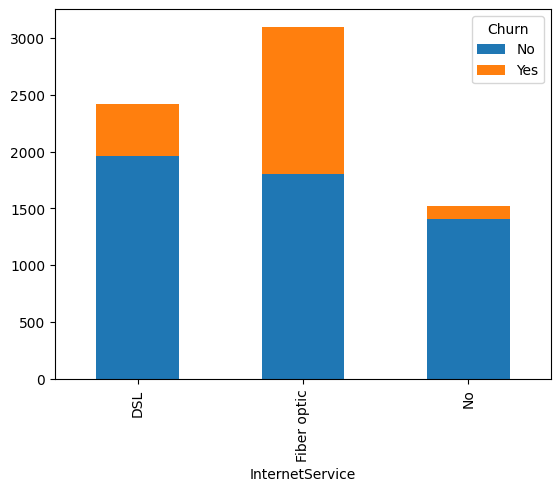

In [27]:
df.groupby(['InternetService', 'Churn']).size().unstack().plot(kind='bar', stacked=True)


# Converting Categorical into Numerical

For Binary columns- Label Encoding

In [28]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn']:
    df[col] = le.fit_transform(df[col])


For Multi class category- One Hot Encoding

In [29]:
df = pd.get_dummies(df, columns=[
    'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
    'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
    'Contract', 'PaymentMethod'
])


In [30]:
# Convert all boolean columns to integers (0/1)
df = df.astype({col: 'int' for col in df.select_dtypes(include='bool').columns})


# Correlation

In [31]:
# customerID
df.drop('customerID', axis=1, inplace=True)

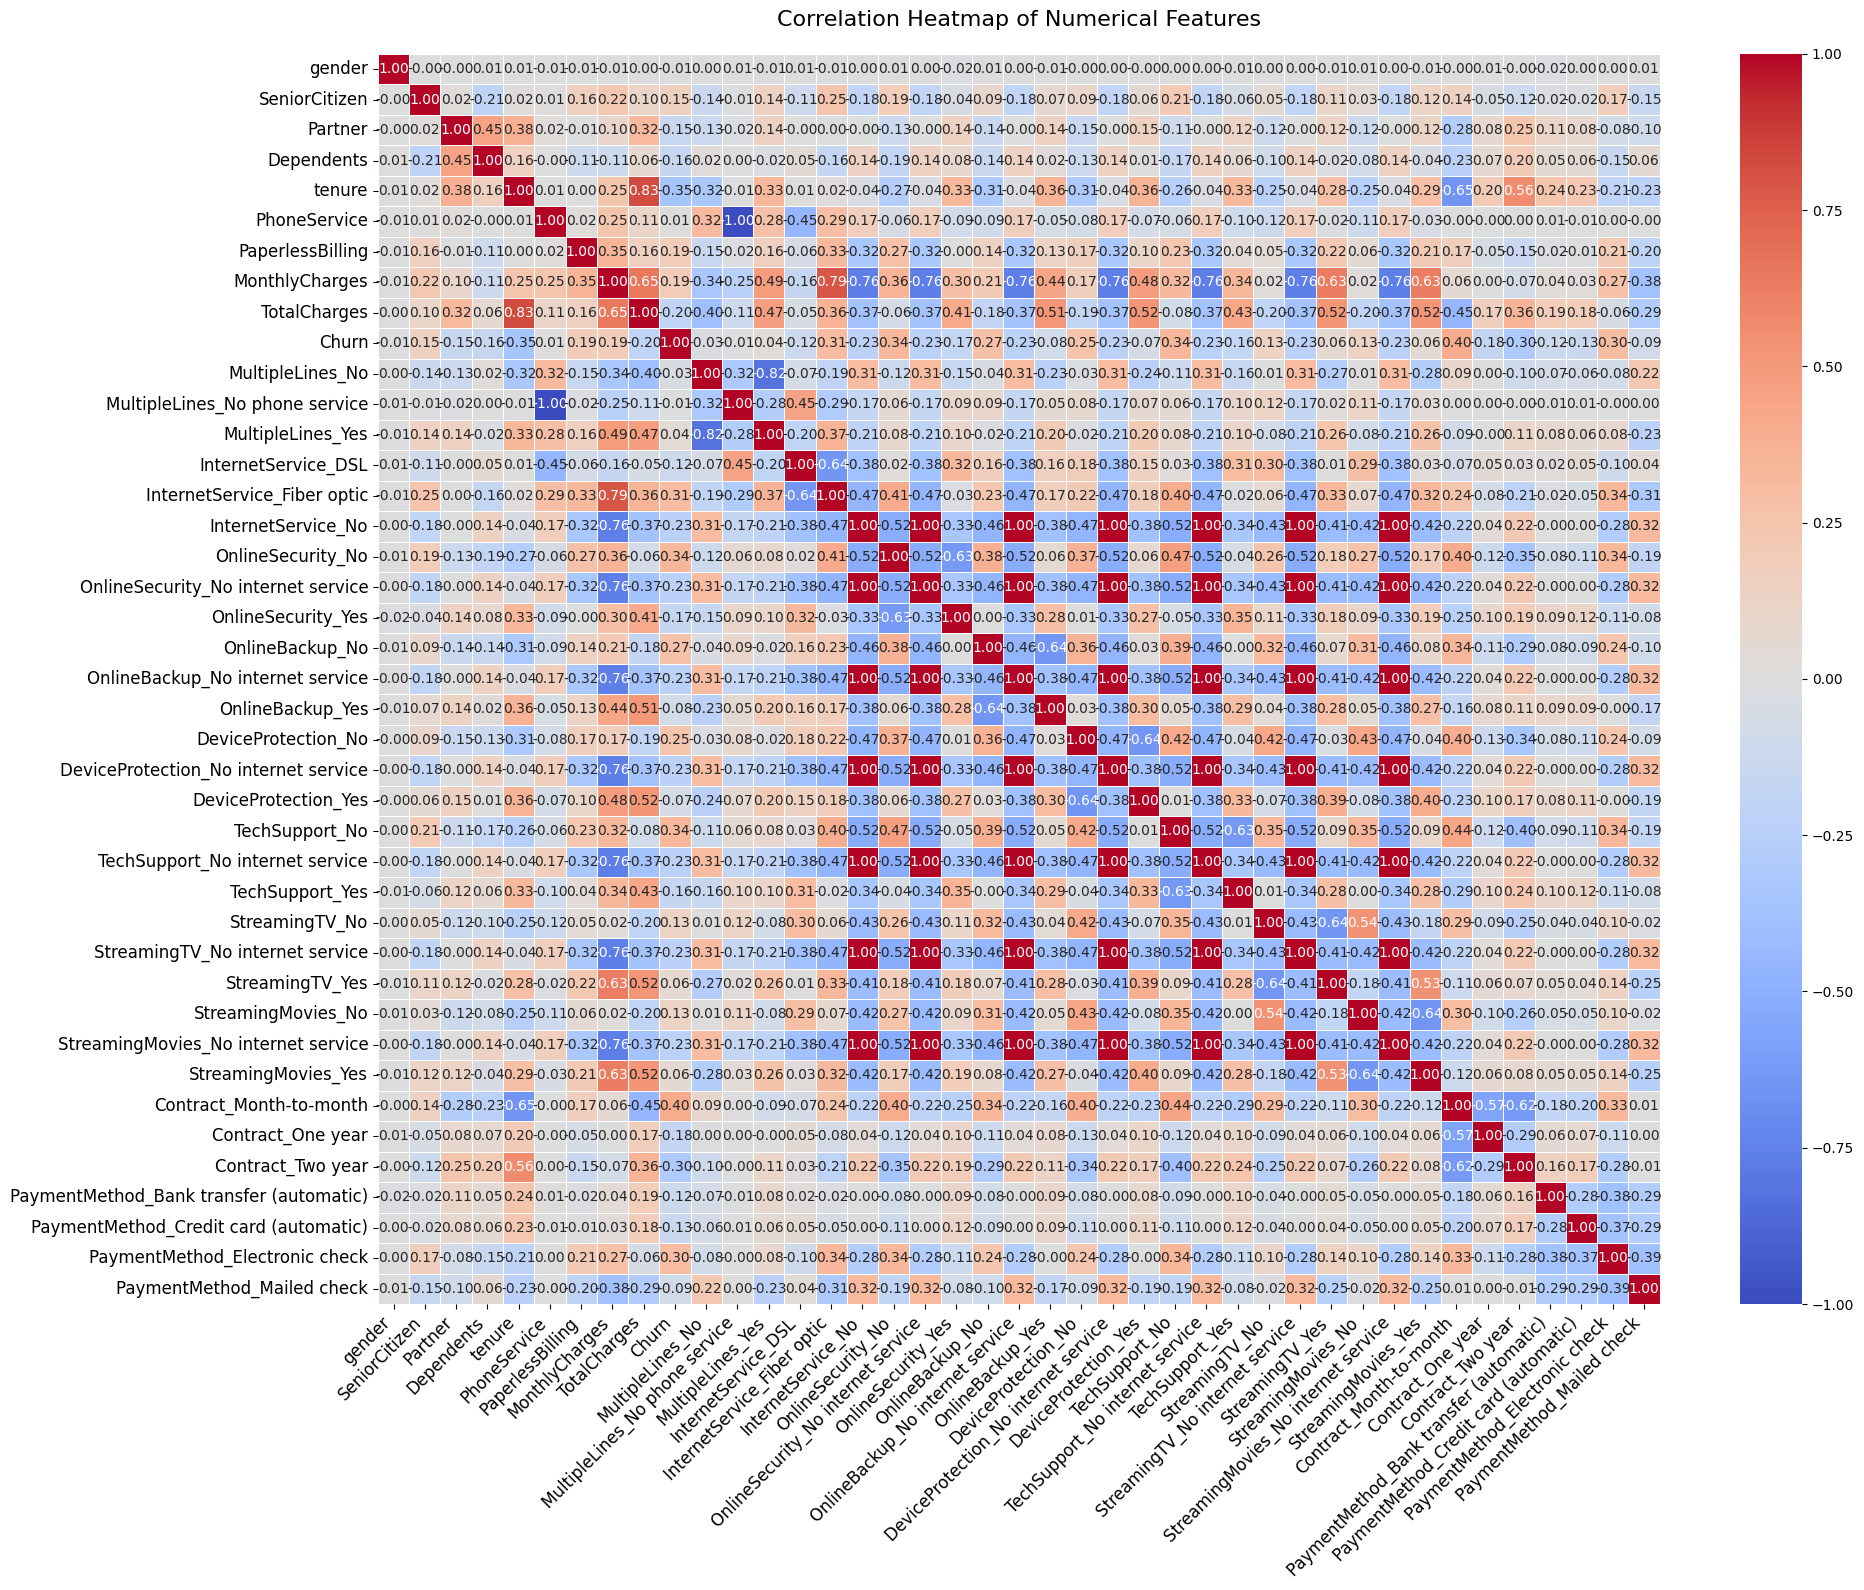

In [32]:
plt.figure(figsize=(20, 16))
heatmap = sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(rotation=0, fontsize=12)

plt.title('Correlation Heatmap of Numerical Features', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [33]:

numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()

correlation_with_Churn = correlation_matrix['Churn']

# Print correlation values with 'Churn'
print(correlation_with_Churn)


gender                                    -0.008545
SeniorCitizen                              0.150541
Partner                                   -0.149982
Dependents                                -0.163128
tenure                                    -0.354049
PhoneService                               0.011691
PaperlessBilling                           0.191454
MonthlyCharges                             0.192858
TotalCharges                              -0.199484
Churn                                      1.000000
MultipleLines_No                          -0.032654
MultipleLines_No phone service            -0.011691
MultipleLines_Yes                          0.040033
InternetService_DSL                       -0.124141
InternetService_Fiber optic                0.307463
InternetService_No                        -0.227578
OnlineSecurity_No                          0.342235
OnlineSecurity_No internet service        -0.227578
OnlineSecurity_Yes                        -0.171270
OnlineBackup

# Key Correlations with Churn:
Strong Positive Correlations (more likely to churn):

Contract_Month-to-month → 0.40

OnlineSecurity_No → 0.34

TechSupport_No → 0.34

PaymentMethod_Electronic check → 0.30

InternetService_Fiber optic → 0.31

OnlineBackup_No, DeviceProtection_No → ~0.25

Strong Negative Correlations (less likely to churn):

tenure → -0.35

Contract_Two year → -0.30

TotalCharges → -0.20

Partner, Dependents → ~-0.15

🧠 Insight:
Customers with month-to-month contracts, no online security or tech support, and who pay via electronic check are more likely to churn. Meanwhile, longer tenure, 2-year contracts, and having dependents or a partner suggest customer retention.

#VIF


In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import pandas as pd

# Select only numeric features (excluding 'Churn')
X = df.select_dtypes(include=['float64', 'int64']).drop('Churn', axis=1)

# Add constant column for intercept
X = add_constant(X)

# Calculate VIF for each feature
vif_df = pd.DataFrame()
vif_df['Feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Display sorted by highest VIF
print(vif_df.sort_values(by="VIF", ascending=False))


/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                                    Feature         VIF
6                              PhoneService         inf
17       OnlineSecurity_No internet service         inf
16                        OnlineSecurity_No         inf
14              InternetService_Fiber optic         inf
15                       InternetService_No         inf
13                      InternetService_DSL         inf
12                        MultipleLines_Yes         inf
11           MultipleLines_No phone service         inf
10                         MultipleLines_No         inf
33                      StreamingMovies_Yes         inf
26          TechSupport_No internet service         inf
27                          TechSupport_Yes         inf
28                           StreamingTV_No         inf
29          StreamingTV_No internet service         inf
30                          StreamingTV_Yes         inf
31                       StreamingMovies_No         inf
32      StreamingMovies_No internet service     

# Outliers

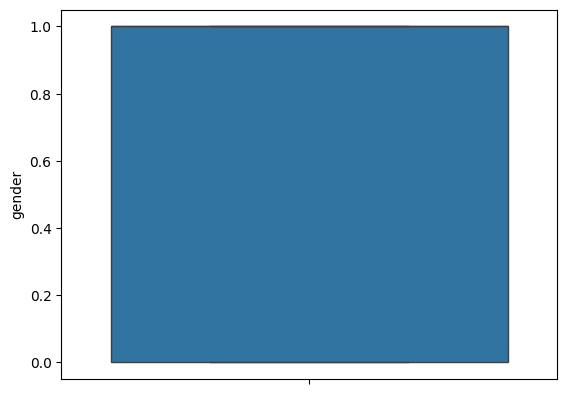

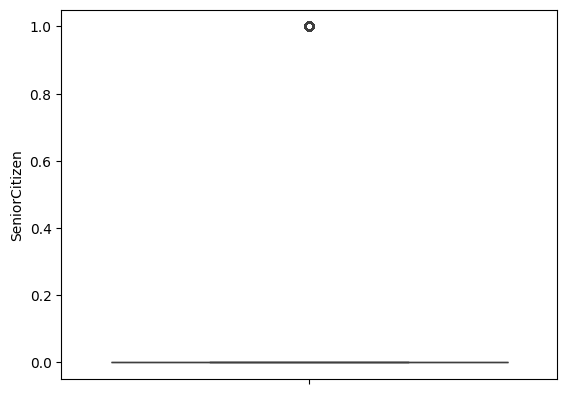

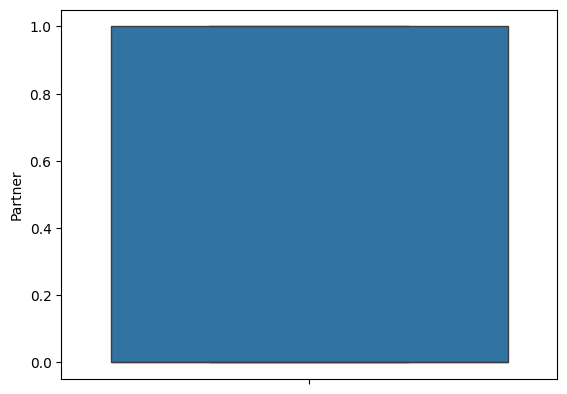

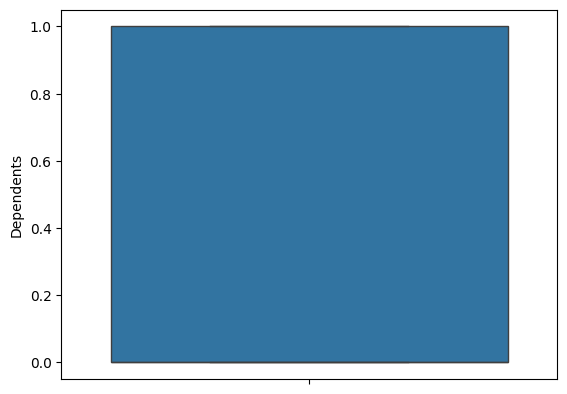

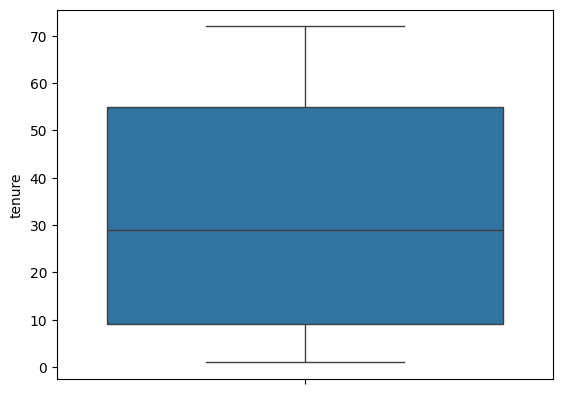

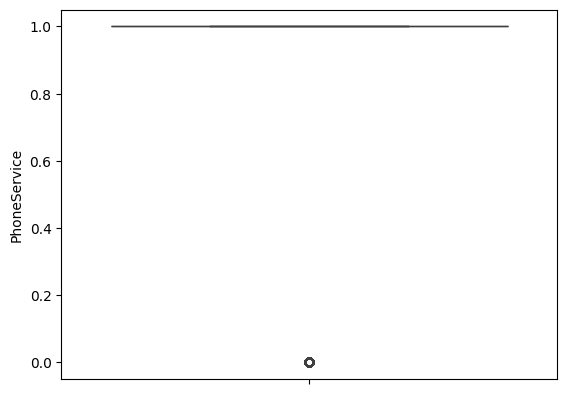

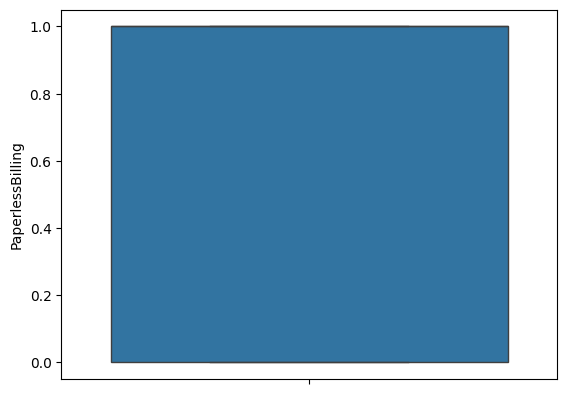

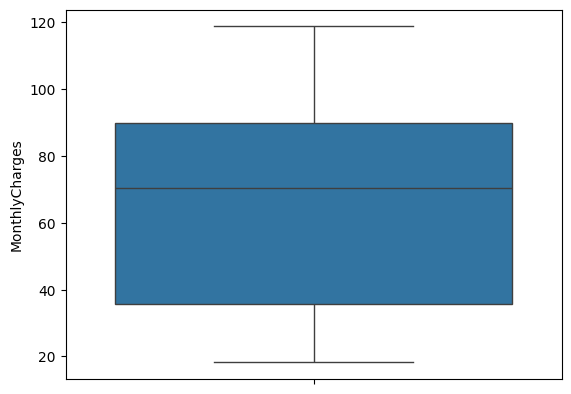

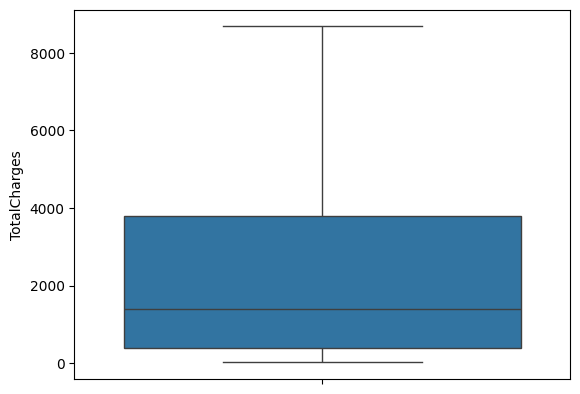

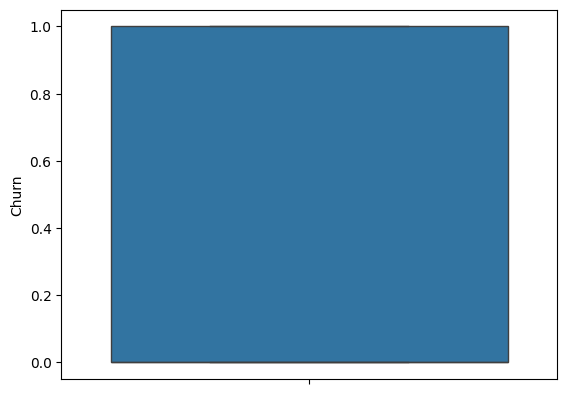

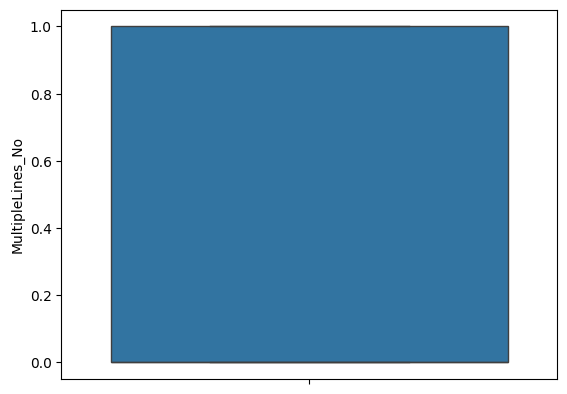

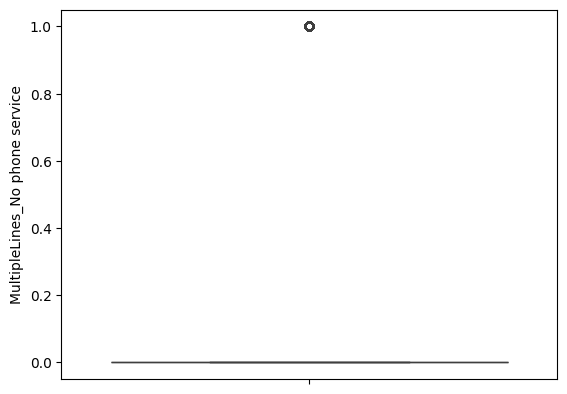

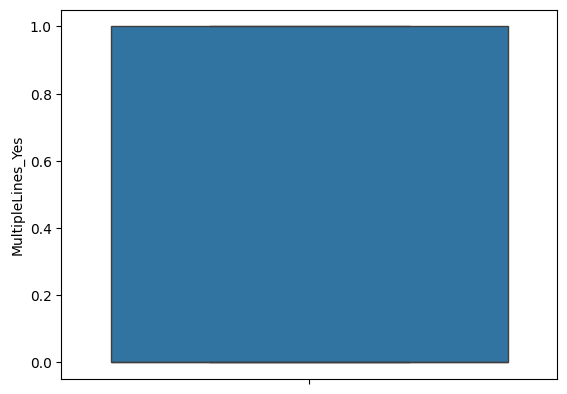

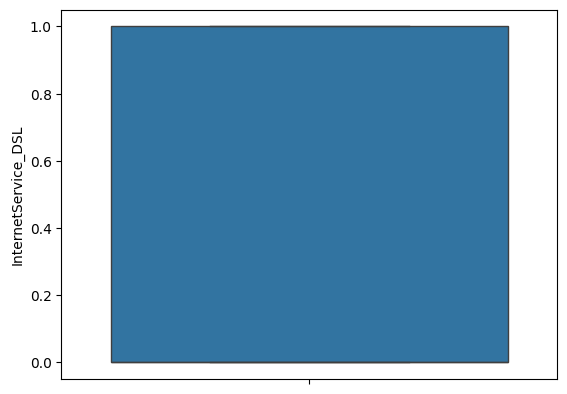

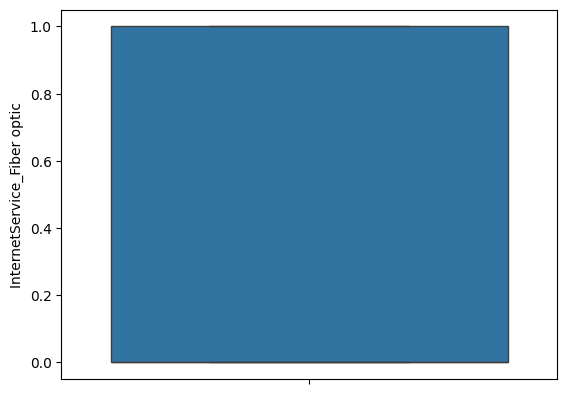

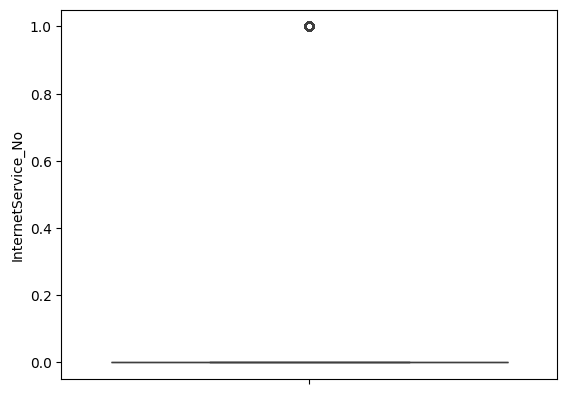

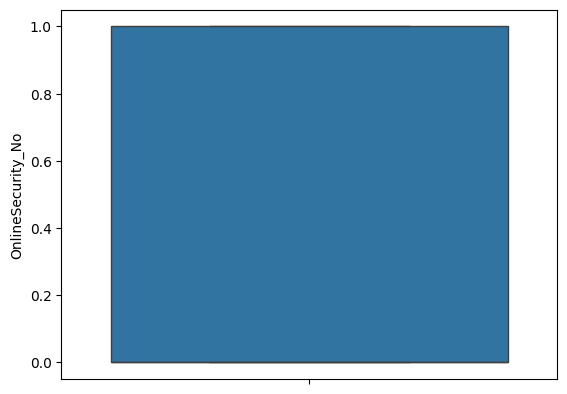

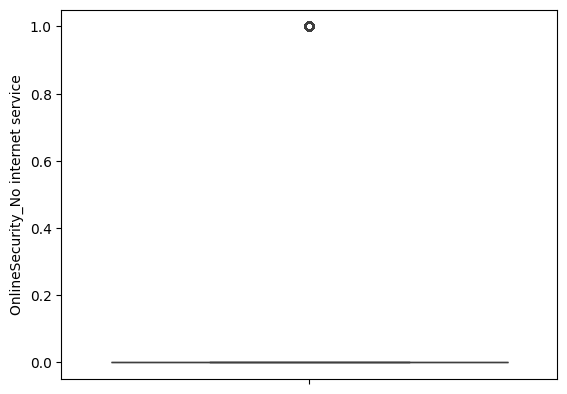

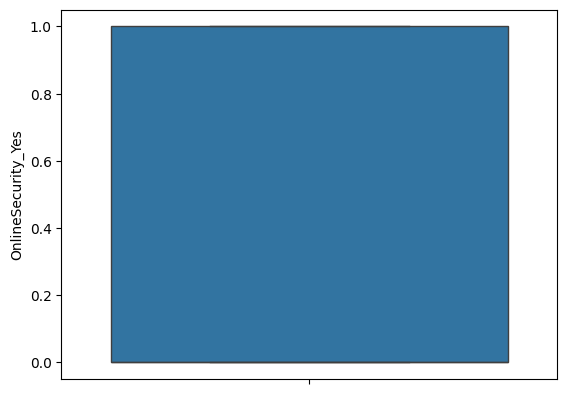

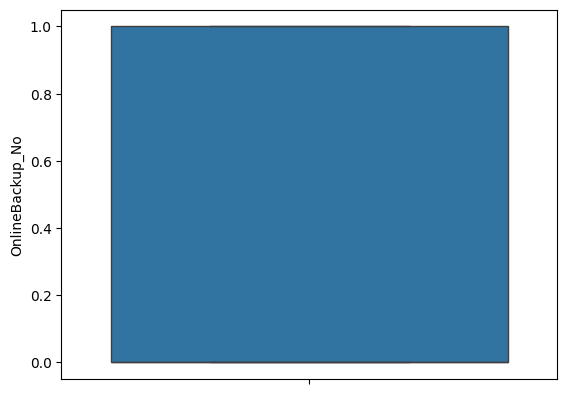

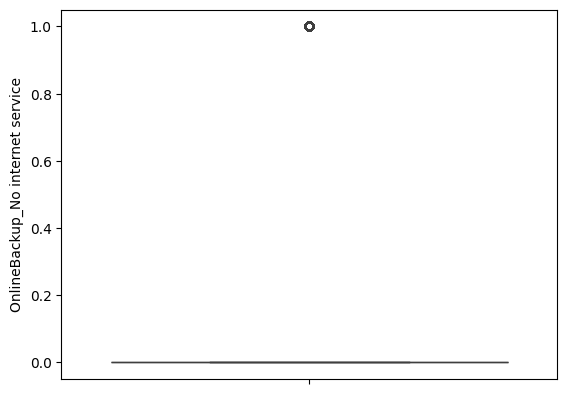

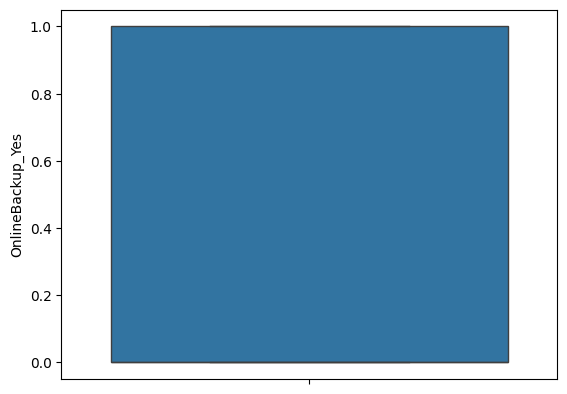

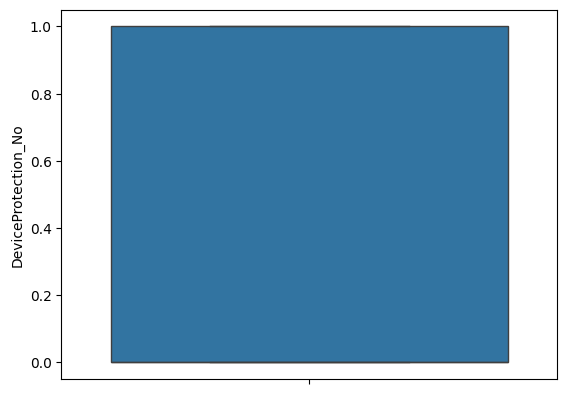

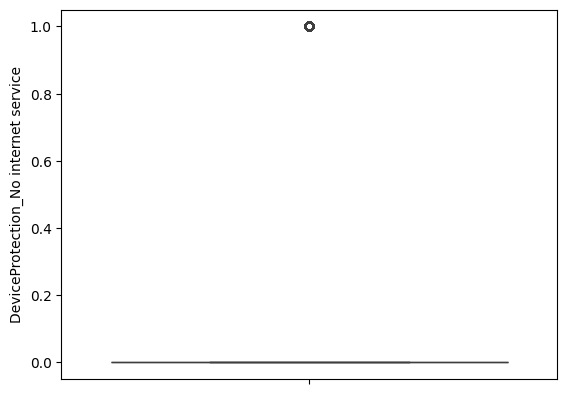

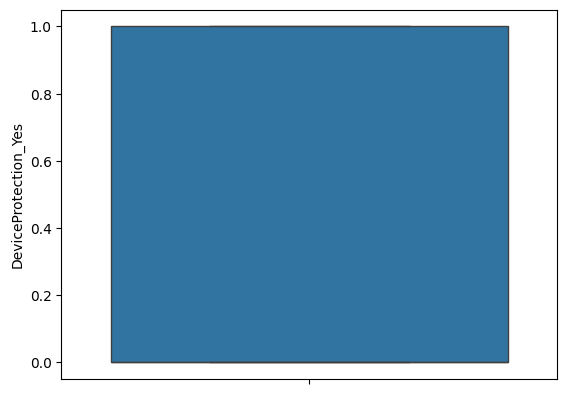

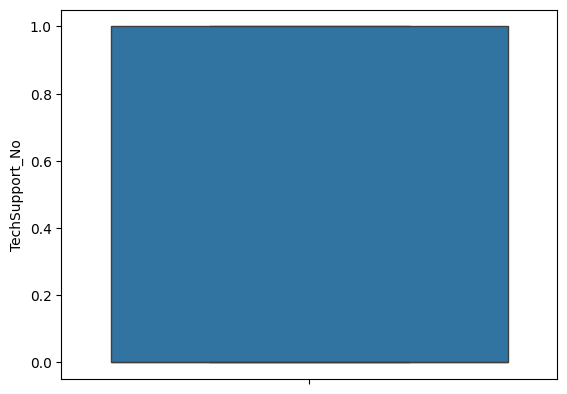

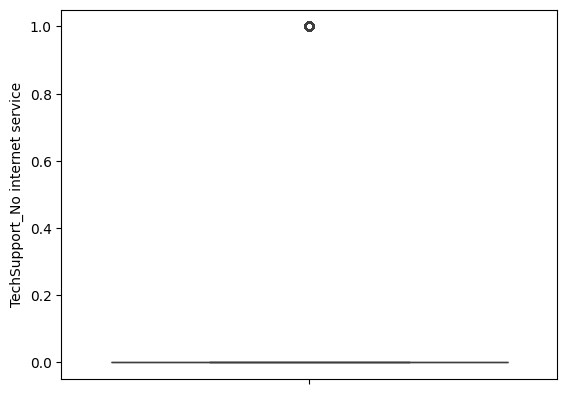

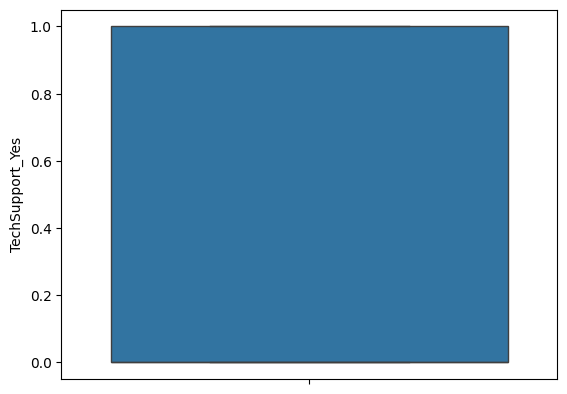

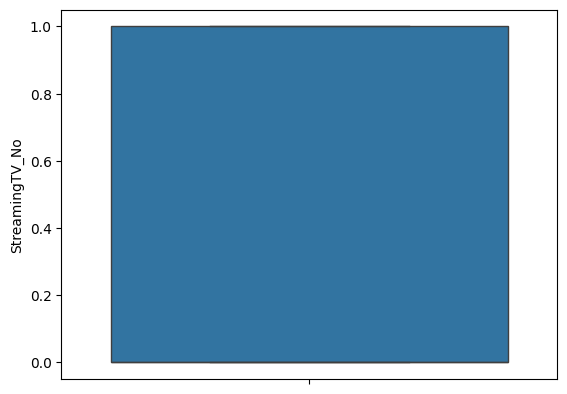

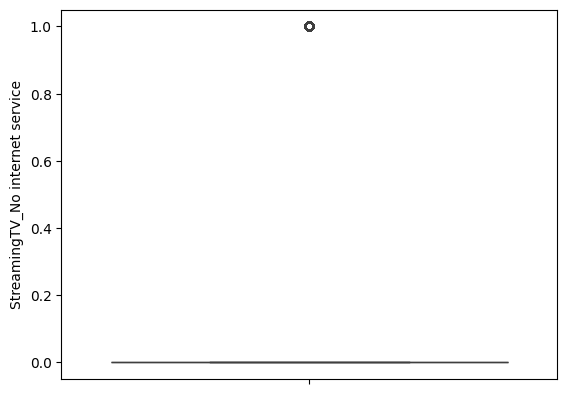

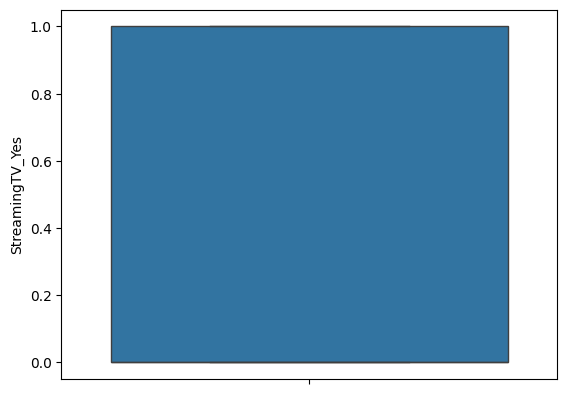

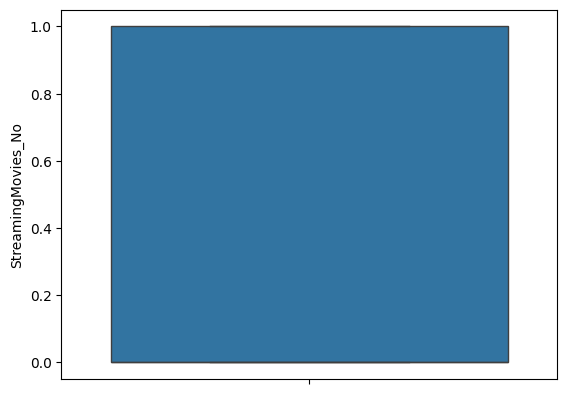

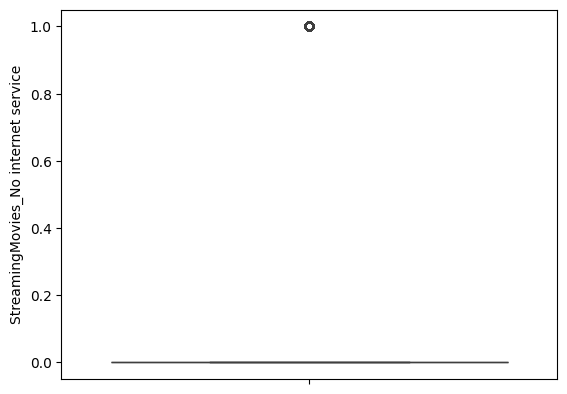

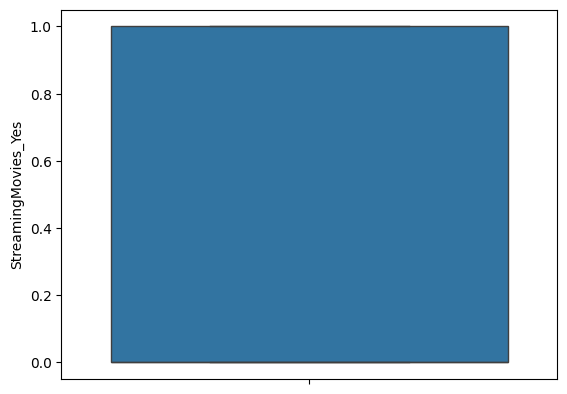

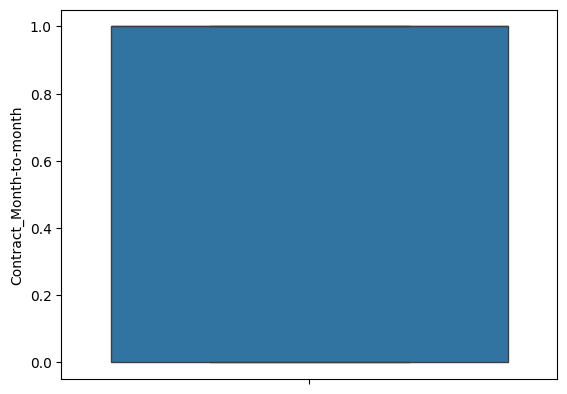

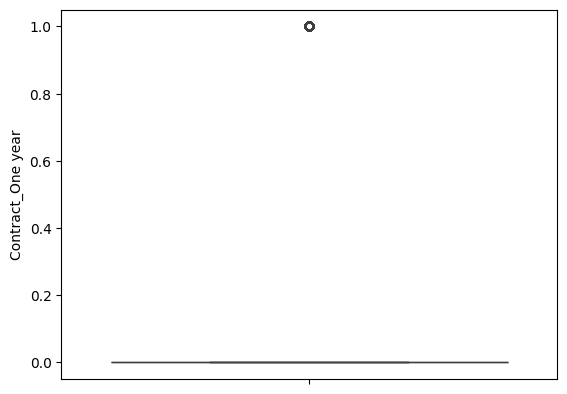

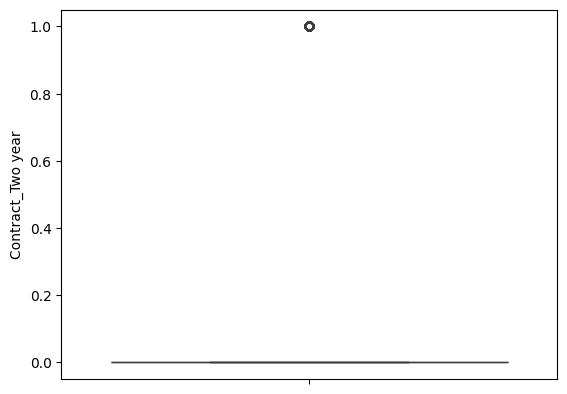

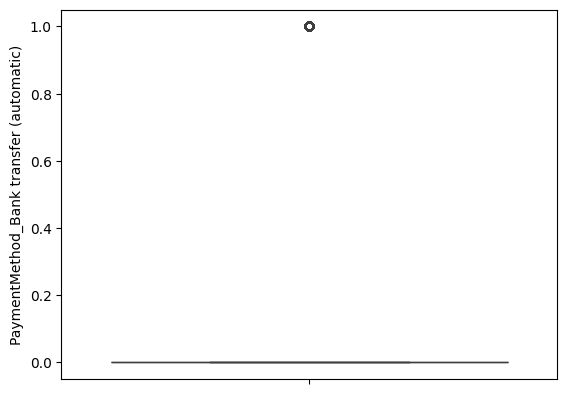

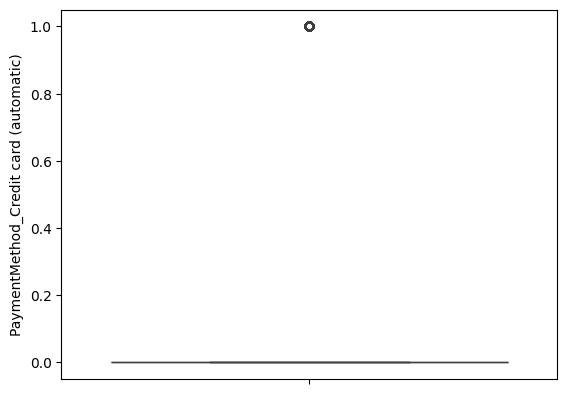

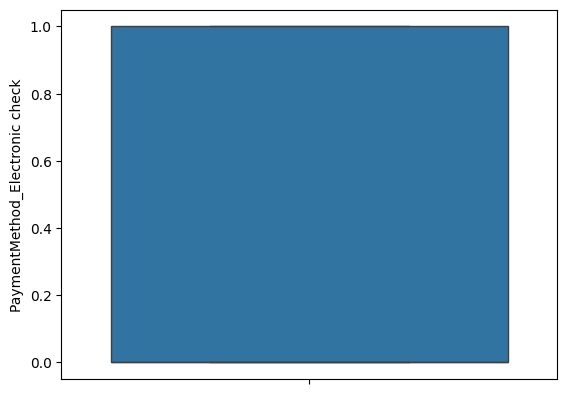

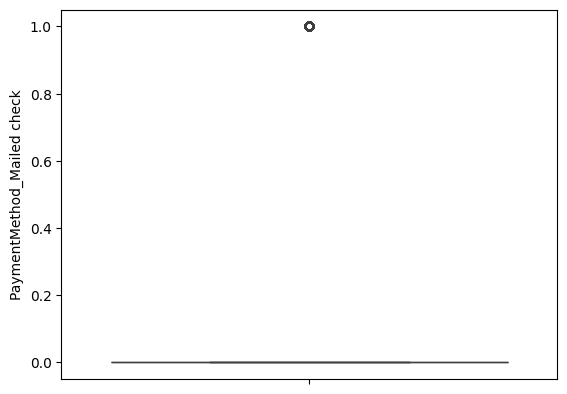

In [35]:
for i in df.columns:
  if (df[i].dtypes == 'int64' or df[i].dtypes == 'float64'):
    sns.boxplot(df[i])
    plt.show()


In [36]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'MultipleLines_No', 'MultipleLines_No phone service',
       'MultipleLines_Yes', 'InternetService_DSL',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No', 'OnlineSecurity_No internet service',
       'OnlineSecurity_Yes', 'OnlineBackup_No',
       'OnlineBackup_No internet service', 'OnlineBackup_Yes',
       'DeviceProtection_No', 'DeviceProtection_No internet service',
       'DeviceProtection_Yes', 'TechSupport_No',
       'TechSupport_No internet service', 'TechSupport_Yes', 'StreamingTV_No',
       'StreamingTV_No internet service', 'StreamingTV_Yes',
       'StreamingMovies_No', 'StreamingMovies_No internet service',
       'StreamingMovies_Yes', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMetho

In [37]:
def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Apply capping
        df[col] = df[col].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

    return df

# numerical columns
numerical_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Contract_Month-to-month', 'PaymentMethod_Electronic check']

# Apply the function to your DataFrame
df = cap_outliers_iqr(df, numerical_cols)


#APPLY
outlier_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
        'Contract_Month-to-month', 'PaymentMethod_Electronic check']
df = cap_outliers_iqr(df, outlier_columns)


In [38]:
def check_remaining_outliers(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        if not outliers.empty:
            print(f"⚠️ {col} still has {len(outliers)} outliers.")
        else:
            print(f"✅ {col} has no remaining outliers.")

# Run the check
check_remaining_outliers(df, numerical_cols)

✅ gender has no remaining outliers.
✅ SeniorCitizen has no remaining outliers.
✅ Partner has no remaining outliers.
✅ Dependents has no remaining outliers.
✅ tenure has no remaining outliers.
✅ PhoneService has no remaining outliers.
✅ PaperlessBilling has no remaining outliers.
✅ MonthlyCharges has no remaining outliers.
✅ TotalCharges has no remaining outliers.
✅ Contract_Month-to-month has no remaining outliers.
✅ PaymentMethod_Electronic check has no remaining outliers.


In [39]:
df.drop(columns=[
    # MultipleLines
    'MultipleLines_No', 'MultipleLines_No phone service', 'MultipleLines_Yes',

    # InternetService
    'InternetService_DSL', 'InternetService_Fiber optic', 'InternetService_No',

    # OnlineSecurity
    'OnlineSecurity_No', 'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',

    # OnlineBackup
    'OnlineBackup_No', 'OnlineBackup_No internet service', 'OnlineBackup_Yes',

    # DeviceProtection
    'DeviceProtection_No', 'DeviceProtection_No internet service', 'DeviceProtection_Yes',

    # TechSupport
    'TechSupport_No', 'TechSupport_No internet service', 'TechSupport_Yes',

    # StreamingTV
    'StreamingTV_No', 'StreamingTV_No internet service', 'StreamingTV_Yes',

    # StreamingMovies
    'StreamingMovies_No', 'StreamingMovies_No internet service', 'StreamingMovies_Yes',

    # Contract
    'Contract_One year', 'Contract_Two year',

    # PaymentMethod
    'PaymentMethod_Bank transfer (automatic)',
    'PaymentMethod_Credit card (automatic)',
    'PaymentMethod_Mailed check'

], inplace=True)


In [40]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Contract_Month-to-month', 'PaymentMethod_Electronic check'],
      dtype='object')

# Scaling

In [41]:
# Split  data
X = df.drop('Churn', axis=1)
y = df['Churn']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# Model Training

SMOTE

In [43]:
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Models dictionary
models = {
    "Decision Tree":DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8),
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}

# Train and evaluate each model with SMOTE inside the pipeline
for name, model in models.items():
    pipeline = Pipeline(steps=[
        ('scaler', StandardScaler()),
        ('smote', SMOTE(random_state=42)),
        ('classifier', model)
    ])

    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    print(f"\n--- {name} ---")
    print(classification_report(y_test, y_pred))



--- Decision Tree ---
              precision    recall  f1-score   support

           0       0.89      0.72      0.80      1033
           1       0.49      0.76      0.60       374

    accuracy                           0.73      1407
   macro avg       0.69      0.74      0.70      1407
weighted avg       0.79      0.73      0.74      1407


--- Logistic Regression ---
              precision    recall  f1-score   support

           0       0.91      0.70      0.79      1033
           1       0.49      0.80      0.61       374

    accuracy                           0.73      1407
   macro avg       0.70      0.75      0.70      1407
weighted avg       0.80      0.73      0.74      1407


--- Random Forest ---
              precision    recall  f1-score   support

           0       0.86      0.79      0.82      1033
           1       0.52      0.65      0.58       374

    accuracy                           0.75      1407
   macro avg       0.69      0.72      0.70      1407

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:40:13] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


In [44]:
df['Churn'].value_counts()


,count
Churn,
0,5163
1,1869


In [45]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(y_test, pipeline.predict_proba(X_test)[:,1]))


0.8081764343509118


In [46]:
from imblearn.over_sampling import SMOTE

# Before SMOTE
print("Before SMOTE:")
print(y_train.value_counts())

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# After SMOTE
print("\nAfter SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Before SMOTE:
Churn
0    4130
1    1495
Name: count, dtype: int64

After SMOTE:
Churn
0    4130
1    4130
Name: count, dtype: int64


# SMOTEENN

In [47]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(X,y)
#

In [48]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled1, y_resampled1,test_size=0.2)
#

# Decision Tree Classifier

In [49]:
model_dt = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [50]:
model_dt.fit(xr_train,yr_train)
preds = model_dt.predict(xr_test)
print(classification_report(yr_test, preds))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92       526
           1       0.92      0.94      0.93       607

    accuracy                           0.93      1133
   macro avg       0.93      0.93      0.93      1133
weighted avg       0.93      0.93      0.93      1133



#Random Classifier

In [51]:
model_rf = RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [52]:
model_rf.fit(xr_train,yr_train)
preds = model_rf.predict(xr_test)
print(classification_report(yr_test, preds))

              precision    recall  f1-score   support

           0       0.91      0.92      0.92       526
           1       0.93      0.93      0.93       607

    accuracy                           0.92      1133
   macro avg       0.92      0.92      0.92      1133
weighted avg       0.92      0.92      0.92      1133



In [62]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'PaperlessBilling', 'MonthlyCharges', 'TotalCharges',
       'Churn', 'Contract_Month-to-month', 'PaymentMethod_Electronic check'],
      dtype='object')

# PCA

In [53]:
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train)
xr_test_pca = pca.transform(xr_test)
explained_variance = pca.explained_variance_ratio_

In [54]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)


In [55]:
model.fit(xr_train_pca,yr_train)
pred = model.predict(xr_test_pca)
print(classification_report(yr_test, pred))

              precision    recall  f1-score   support

           0       0.74      0.68      0.71       526
           1       0.74      0.79      0.76       607

    accuracy                           0.74      1133
   macro avg       0.74      0.73      0.74      1133
weighted avg       0.74      0.74      0.74      1133



# Model Picking

In [56]:
import pickle

In [57]:
filename = 'model.sav'

In [58]:
pickle.dump(model_rf, open(filename, 'wb'))

In [59]:
load_model = pickle.load(open(filename, 'rb'))

In [60]:
model_score_r1 = load_model.score(xr_test, yr_test)

In [61]:
model_score_r1

0.9232127096204766

In [63]:
import pandas as pd

def predict_churn(gender, senior_citizen, partner, dependents, tenure,
                  phone_service, paperless_billing, monthly_charges,
                  total_charges, contract_month_to_month, payment_method_electronic_check):

    input_data = pd.DataFrame([[gender, senior_citizen, partner, dependents, tenure,
                                phone_service, paperless_billing, monthly_charges,
                                total_charges, contract_month_to_month, payment_method_electronic_check]],
                              columns=['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
                                       'PhoneService', 'PaperlessBilling', 'MonthlyCharges',
                                       'TotalCharges', 'Contract_Month-to-month', 'PaymentMethod_Electronic check'])


    prediction = model_rf.predict(input_data)

    # Return result
    return "Churn" if prediction[0] == 1 else "No Churn"


In [65]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.9/46.9 MB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 20.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 70.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.7 MB/s eta 0:00:00


In [66]:
import gradio as gr

# Define the input components
inputs = [
    gr.Radio(choices=['Male', 'Female'], label="Gender"),
    gr.Checkbox(label="Senior Citizen"),
    gr.Checkbox(label="Partner"),
    gr.Checkbox(label="Dependents"),
    gr.Slider(minimum=0, maximum=100, step=1, label="Tenure"),
    gr.Checkbox(label="Phone Service"),
    gr.Checkbox(label="Paperless Billing"),
    gr.Number(label="Monthly Charges"),
    gr.Number(label="Total Charges"),
    gr.Checkbox(label="Contract Month-to-Month"),
    gr.Checkbox(label="Payment Method: Electronic Check")
]


output = gr.Textbox(label="Prediction")


interface = gr.Interface(fn=predict_churn, inputs=inputs, outputs=output)


In [68]:
interface.launch(share=True)


Rerunning server... use `close()` to stop if you need to change `launch()` parameters.
----
Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://d5816136f393cbe9a2.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
